# **Customer-Churn-Prediction-using-Artificial-Neural-Networks-ANN**

# Importing Libraries

In [196]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


# Loading Dataset

In [197]:
df=pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")

# Data Analysis

In [198]:
# Checking size(rows,columns) of dataset
df.shape

(7043, 21)

In [199]:
#To display top 5 row in dataset
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [200]:
#To display Bottom 5 rows
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


# Data Cleaning

In [201]:
#drop customer id
df.drop('customerID',axis=1,inplace=True)

In [202]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [203]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [204]:
# Convert 'TotalCharges' column from object to numerical
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
# 'errors='coerce'' handles any invalid values by converting them to NaN
# Print the updated DataFrame
print(df.dtypes)

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object


**Missing Values**


In [205]:
#checking for null values
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [206]:
# Remove null values from 'TotalCharges' column
df = df.dropna(subset=['TotalCharges'])
print(df.isnull().sum())

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


**Finding Duplicate Values**

In [207]:
#checking for no of duplicate values
df.duplicated().sum()

22

In [208]:
df.drop_duplicates()
df.shape


(7032, 20)

# **EDA**

Text(0.5, 1.0, 'Customer churn Prediction Visualisation')

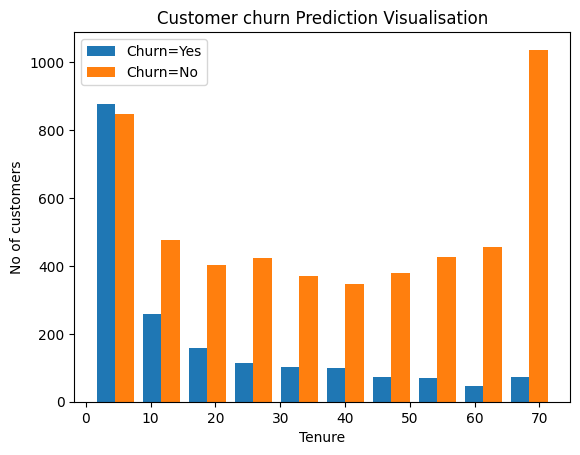

In [209]:
tenure_churn_no=df[df.Churn=='No'].tenure
tenure_churn_yes=df[df.Churn=='Yes'].tenure
plt.hist([tenure_churn_yes,tenure_churn_no],label=['Churn=Yes','Churn=No'])
plt.legend()
plt.xlabel('Tenure')
plt.ylabel('No of customers')
plt.title('Customer churn Prediction Visualisation')


Text(0.5, 1.0, 'Customer churn Prediction Visualisation')

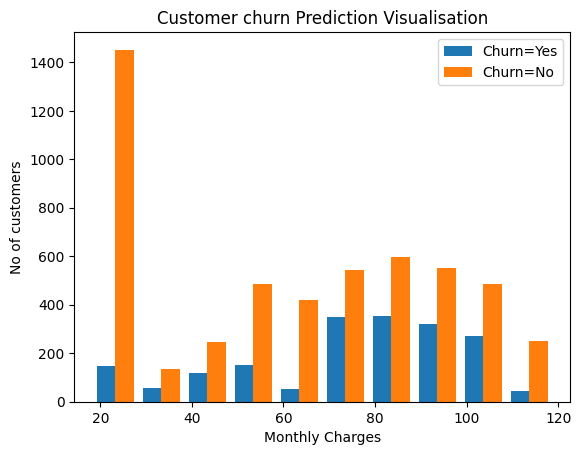

In [210]:
monthly_charges_no=df[df.Churn=='No'].MonthlyCharges
monthly_charges_yes=df[df.Churn=='Yes'].MonthlyCharges
plt.hist([monthly_charges_yes,monthly_charges_no],label=['Churn=Yes','Churn=No'])
plt.legend()
plt.xlabel('Monthly Charges')
plt.ylabel('No of customers')
plt.title('Customer churn Prediction Visualisation')

Text(0.5, 1.0, 'Customer churn Prediction Visualisation')

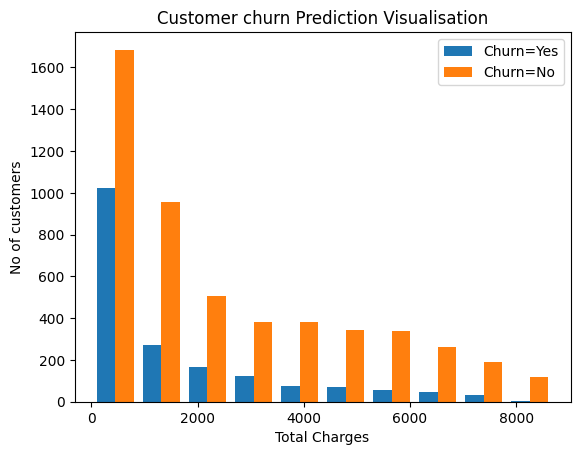

In [211]:
Total_charges_no=df[df.Churn=='No'].TotalCharges
Total_charges_yes=df[df.Churn=='Yes'].TotalCharges
plt.hist([Total_charges_yes,Total_charges_no],label=['Churn=Yes','Churn=No'])
plt.legend()
plt.xlabel('Total Charges')
plt.ylabel('No of customers')
plt.title('Customer churn Prediction Visualisation')


**ENCODING**

In [212]:
df.nunique()

gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                72
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1584
TotalCharges        6530
Churn                  2
dtype: int64

In [214]:
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}')

In [215]:
print_unique_col_values(df)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [213]:
df.replace('No phone service','No',inplace=True)
df.replace('No internet service','No',inplace=True)

In [156]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [157]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
 'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
 df[col].replace({'Yes': 1,'No': 0},inplace=True)


In [158]:
df['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [159]:
df['gender'].replace({'Female':1,'Male':0},inplace=True)

In [160]:
df['gender'].unique()


array([1, 0])

In [161]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,0,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,0,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,0,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,1,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,24,1,1,DSL,1,0,1,1,1,1,One year,1,Mailed check,84.80,1990.50,0
7039,1,0,1,1,72,1,1,Fiber optic,0,1,1,0,1,1,One year,1,Credit card (automatic),103.20,7362.90,0
7040,1,0,1,1,11,0,0,DSL,1,0,0,0,0,0,Month-to-month,1,Electronic check,29.60,346.45,0
7041,0,1,1,0,4,1,1,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Mailed check,74.40,306.60,1


In [162]:
df['InternetService'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [163]:
df['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [164]:
df['PaymentMethod'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [165]:
df1=pd.get_dummies(data=df,columns=['InternetService','Contract','PaymentMethod'])


In [166]:
df1

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,2,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,45,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,24,1,1,1,0,1,...,1,0,0,0,1,0,0,0,0,1
7039,1,0,1,1,72,1,1,0,1,1,...,0,1,0,0,1,0,0,1,0,0
7040,1,0,1,1,11,0,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
7041,0,1,1,0,4,1,1,0,0,0,...,0,1,0,1,0,0,0,0,0,1


In [167]:
df1.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

**scaling**

In [168]:
col_to_scale=['tenure','MonthlyCharges','TotalCharges']
#convert values to 0-1
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df1[col_to_scale] = scaler.fit_transform(df1[col_to_scale])


In [169]:
df1[col_to_scale]

,tenure,MonthlyCharges,TotalCharges
0,0.000000,0.115423,0.001275
1,0.464789,0.385075,0.215867
2,0.014085,0.354229,0.010310
3,0.619718,0.239303,0.210241
4,0.014085,0.521891,0.015330
...,...,...,...
7038,0.323944,0.662189,0.227521
7039,1.000000,0.845274,0.847461
7040,0.140845,0.112935,0.037809
7041,0.042254,0.558706,0.033210


**Feature and Target Selection**

In [170]:
X=df1.drop('Churn',axis='columns')
y=df1['Churn']


In [171]:
print(X)

      gender  SeniorCitizen  Partner  Dependents    tenure  PhoneService  \
0          1              0        1           0  0.000000             0   
1          0              0        0           0  0.464789             1   
2          0              0        0           0  0.014085             1   
3          0              0        0           0  0.619718             0   
4          1              0        0           0  0.014085             1   
...      ...            ...      ...         ...       ...           ...   
7038       0              0        1           1  0.323944             1   
7039       1              0        1           1  1.000000             1   
7040       1              0        1           1  0.140845             0   
7041       0              1        1           0  0.042254             1   
7042       0              0        0           0  0.915493             1   

      MultipleLines  OnlineSecurity  OnlineBackup  DeviceProtection  ...  \
0          

In [172]:
print(y)

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7032, dtype: int64


**Spliting**

In [173]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)


In [174]:
X_train.shape


(5625, 26)

In [175]:
X_test.shape

(1407, 26)

In [176]:
len(X_train.columns)

26

# MODEL

In [177]:
import tensorflow as tf
from tensorflow import keras
model = keras.Sequential([
 keras.layers.Dense(20, input_shape=(26,), activation='relu'),
 keras.layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam',
 loss='binary_crossentropy',
 metrics=['accuracy'])
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
176/176 [==============================] - 1s 2ms/step - loss: 0.5049 - accuracy: 0.7461
Epoch 2/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4301 - accuracy: 0.7975
Epoch 3/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4203 - accuracy: 0.8002
Epoch 4/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4164 - accuracy: 0.8046
Epoch 5/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4132 - accuracy: 0.8041
Epoch 6/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4118 - accuracy: 0.8087
Epoch 7/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4105 - accuracy: 0.8089
Epoch 8/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4096 - accuracy: 0.8069
Epoch 9/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4087 - accuracy: 0.8089
Epoch 10/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4073 - accura

In [178]:
model.evaluate(X_test,y_test)


44/44 [==============================] - 0s 1ms/step - loss: 0.4496 - accuracy: 0.7875


[0.4495689570903778, 0.7874911427497864]

In [179]:
y_pred=model.predict(X_test)


44/44 [==============================] - 0s 1ms/step


In [180]:
print(y_pred.shape)
print(y_pred[0])

(1407, 1)
[0.31421232]


In [181]:
print(y_pred)

[[0.31421232]
 [0.43170395]
 [0.02085173]
 ...
 [0.79258054]
 [0.71302396]
 [0.9077903 ]]


In [195]:
y_test

2660    0
744     0
5579    1
64      1
3287    1
       ..
2024    0
4396    1
4081    1
1297    0
4899    1
Name: Churn, Length: 1407, dtype: int64

In [183]:
y_prediction=[]
for elements in y_pred:
 if elements>0.5:
   y_prediction.append(1)
 else:
   y_prediction.append(0)


In [192]:
y_prediction[:10]

[0, 0, 0, 1, 1, 1, 0, 1, 0, 0]

In [217]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_test,y_prediction))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85       999
           1       0.66      0.56      0.60       408

    accuracy                           0.79      1407
   macro avg       0.74      0.72      0.73      1407
weighted avg       0.78      0.79      0.78      1407



Text(95.72222222222221, 0.5, 'Truth')

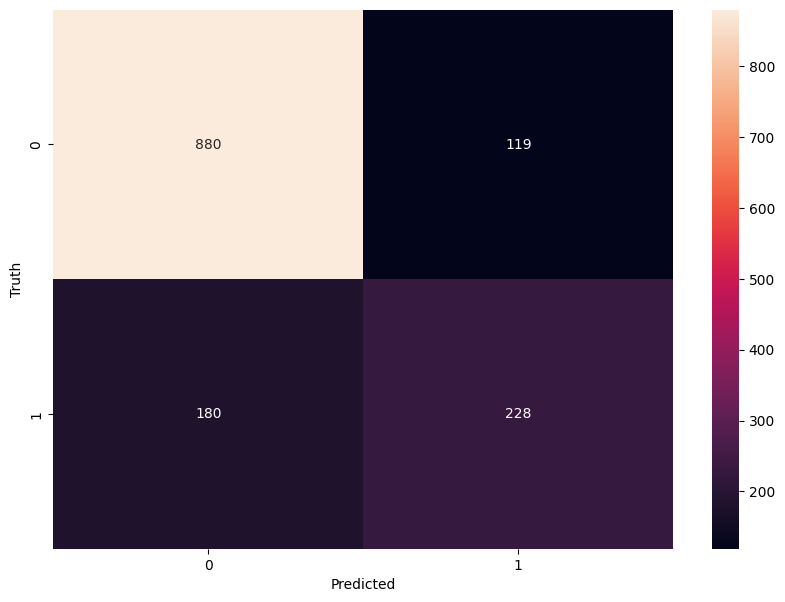

In [185]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_prediction)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')


# ACCURACY


In [186]:
round((873+222)/(873+222+186+126),2)

0.78

# Precision for 0 class. i.e. Precision for customers who did not churn

In [187]:
round(873/(873+186),2)


0.82

## Precision for 1 class. i.e. Precision for customers who actually
# churned


In [188]:
round(222/(222+126),2)


0.64

# Recall for 0

In [189]:
round(873/(873+126),2)


0.87

# Recall for 1


In [191]:
round(222/(222+186),2)


0.54